# Plotting in python: Matplotlib

There are many different python packages that can be useful for geophysical analysis.  These include reading data from files (e.g., pandas), data handling routines (e.g., xarray), plotting (matplotlib) and others.  We will go through several example cases in this section.  

Most of our plotting will be done using the Matlab equivalent “matplotlib” package.  This is typically imported in scripts, specifically the pyplot routines, as “plt”.  In the examples below we will look at plotting data using matplotlib, reading data from a from a file using pandas, and then creating our own data arrays with numpy.

Matplotlib is the most popular plotting library in python. Using matplotlib, you can create pretty much any type of plot and the syntax is much like Matlab (so it should be easy going back and forth between the two).

The standard way to import matplotlib is by just loading the pyplot object.  Here we will alias this to simply plot.

To plot a series of numbers, with the independent (x-axis) and dependent variables (y-axis) already defined, use the plot function.  Note that if the independent variable is not supplied, the x-axis will be the list position.  For example:

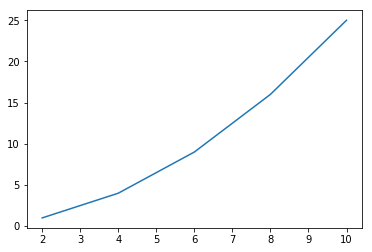

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [ 2, 4, 6, 8, 10 ]
y = [ 1, 4, 9, 16, 25 ]
plt.plot(x,y)

The plot shows y plotted as a function of x.  Just like in matlab, if we just plot y (plt.plot(y), we'd get a plot of y as a function of index (0, 1, 2, …) since the independent variable was not specified.

There are a few things to note.  First, in this notebook the plot is shown "in line".  Normally, in an interactive session, the plot doesn’t actually appear until the “show” command is issued (e.g., plt.show()).  Second, the generated plot is a line using the default color and style (and no symbol).  We will see how to change this next.  Finally, to save the figure to an image, the plt.savefig function can be used (more on this later).

The plot can be spruced up a bit by optionally specifying the color, symbol and line style (in that order).  These are specified with a single character for each.  Colors, for example, can be specified as red (‘r’), green (‘g’), etc.; symbols as circles (‘o’), squares (‘s’), etc.; and lines as solid (‘-‘), dashed (‘- -‘), etc.  Further examples:
<ul>
 <li>'r*--' : ‘red stars with dashed lines’
 <li>'ks.' : ‘black squares with dotted line’ (‘k’ stands for black)
 <li>'bD-.' : ‘blue diamonds with dash-dot line’.
</ul>
For a complete list of colors, markers and linestyles, check out the help(plt.plot) command.
Let’s repeat the example above but use green dots:

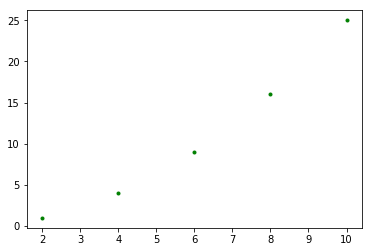

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [ 2, 4, 6, 8, 10 ]
y = [ 1, 4, 9, 16, 25 ]
plt.plot(x,y,'g.')

Just like Matlab, multiple lines can be plotted in the same panel by calling plt.plot multiple times.  With multiple lines, it’s usually helpful to include a legend.  Legends, and more generally plot labels are done using specific function calls.

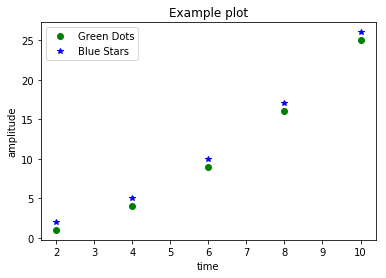

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [ 2, 4, 6, 8, 10 ]
y = [ 1, 4, 9, 16, 25 ]
z = [ 2, 5, 10, 17, 26 ]
plt.plot(x,y,'go',label='Green Dots')
plt.plot(x,z,'b*',label='Blue Stars')
plt.title('Example plot')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend(loc='upper left')

Before proceeding, it should be noted that matplotlib is somewhat different in the sense that is has both a Matlab-like syntax and object-oriented syntax, and this can lead to confusion. Thus, there is no one consistent way to make the same plot (for example).  We will see examples of this when making a figure with more than one panel.  One way to achieve this is using “axes”, whereby a figure with subplots is defined as an object, and then formatted later.  The Matlab syntax, on the other hand, is considered “stateful”.  In this case plt keeps track of which subplot is active, and formats that specific one.  So whatever you draw with plt.{anything} will reflect only on the current subplot.  Practically speaking, the main difference between the two syntaxes is, in Matlab-like syntax, all plotting is done using plt methods instead of the respective axes‘s method as in object oriented syntax.

As an example, let’s draw our two sets of points (green rounds and blue stars) in two separate plots side-by-side instead of the same plot.  You can do that by creating two separate subplots, aka, axes, using plt.subplots(1, 2). This creates and returns two objects:

<ul>
  <li>the figure
  <li>the axes (subplots) inside the figure
</ul>

Previously, I called plt.plot() to draw the points. Since there was only one axes by default, it drew the points on that axes itself.  But now, since you want the points drawn on different subplots (axes), you have to call the plot function in the respective axes (ax1 and ax2 in below code) instead of plt.  Notice in below code, calls are made to ax1.plot() and ax2.plot() instead of calling plt.plot() twice.

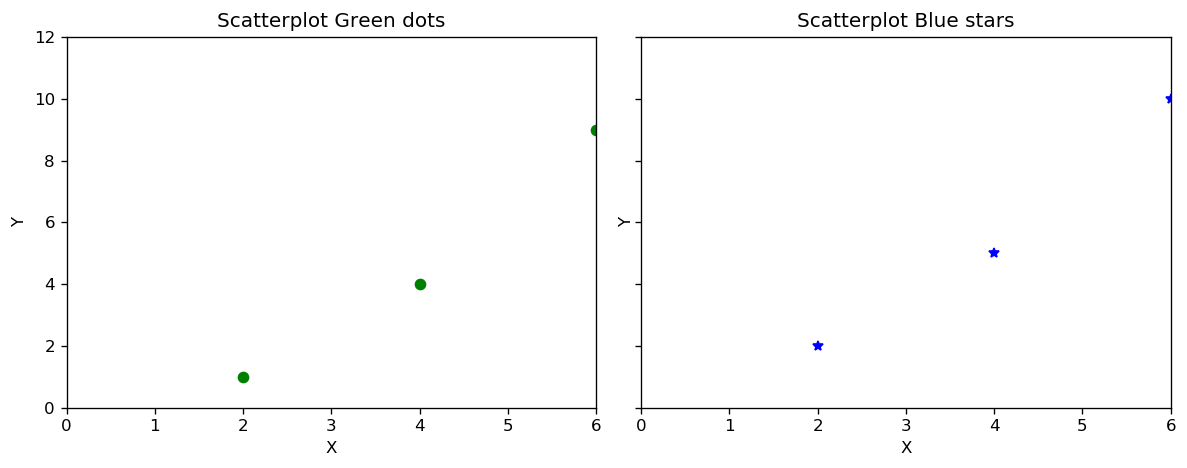

In [6]:
# import functions
from matplotlib import pyplot as plt

# make sure figures show up "in-line"
%matplotlib inline

# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Create variables
x = [ 2, 4, 6, 8, 10 ]
y = [ 1, 4, 9, 16, 25 ]
z = [ 2, 5, 10, 17, 26 ]

# Plot
ax1.plot(x,y, 'go')  # green dots
ax2.plot(x,z, 'b*')  # blue stars

# Title, X and Y labels, X and Y Lim
ax1.set_title('Scatterplot Green dots')
ax2.set_title('Scatterplot Blue stars')
ax1.set_xlabel('X');  ax2.set_xlabel('X')  # x label
ax1.set_ylabel('Y');  ax2.set_ylabel('Y')  # y label
ax1.set_xlim(0, 6) ;  ax2.set_xlim(0, 6)   # x axis limits
ax1.set_ylim(0, 12);  ax2.set_ylim(0, 12)  # y axis limits

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()